# Análisis de datos del Titanic

Este notebook tiene como objetivo analizar el conjunto de datos del Titanic disponible en la biblioteca Seaborn. Vamos a explorar los datos y tratar de extraer algunas conclusiones interesantes.

In [ ]:
# Importando las bibliotecas necesarias
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Cargando el conjunto de datos del Titanic
titanic = sns.load_dataset('titanic')

# Mostrando las primeras filas del conjunto de datos
titanic.head()

## Análisis exploratorio de datos

Vamos a realizar un análisis exploratorio de los datos para entender mejor las características de los pasajeros del Titanic.

In [ ]:
# Información general sobre los datos
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


Podemos ver que algunas columnas tienen valores nulos, como 'age', 'embarked', 'deck' y 'embark_town'. Esto es algo que debemos tener en cuenta al realizar nuestro análisis.

Ahora, vamos a visualizar la distribución de algunas variables.

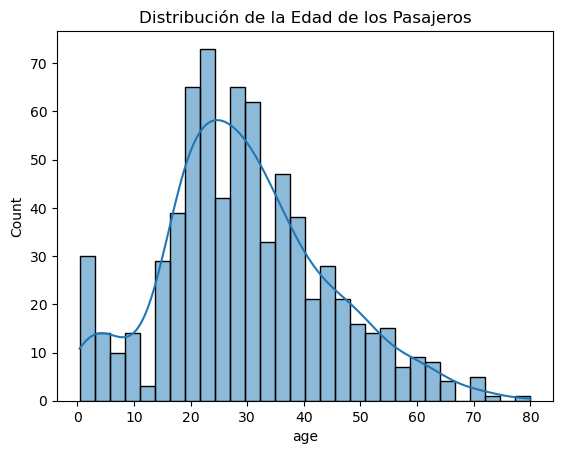

In [ ]:
# Distribución de la edad de los pasajeros
sns.histplot(data=titanic, x='age', kde=True, bins=30)
plt.title('Distribución de la Edad de los Pasajeros')
plt.show()

La distribución de la edad de los pasajeros muestra que la mayoría de los pasajeros tenían entre 20 y 30 años. También había un número significativo de niños a bordo.

Ahora, vamos a explorar la relación entre la supervivencia y otras variables.

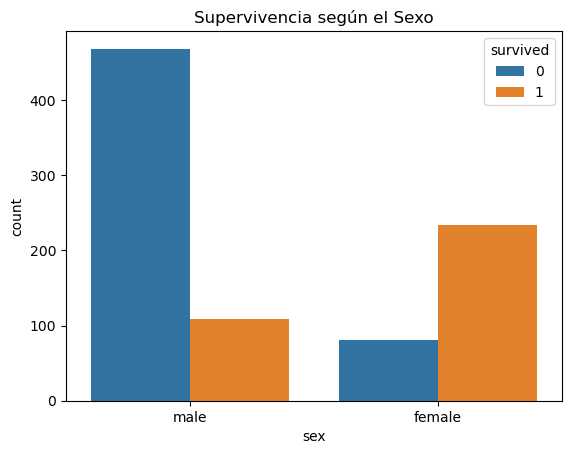

In [ ]:
# Relación entre la supervivencia y el sexo
sns.countplot(data=titanic, x='sex', hue='survived')
plt.title('Supervivencia según el Sexo')
plt.show()

El gráfico muestra que las mujeres tenían una tasa de supervivencia mucho más alta que los hombres. Esto puede ser debido a la política de 'mujeres y niños primero' para los botes salvavidas.

A continuación, vamos a explorar la relación entre la supervivencia y la clase del pasajero.

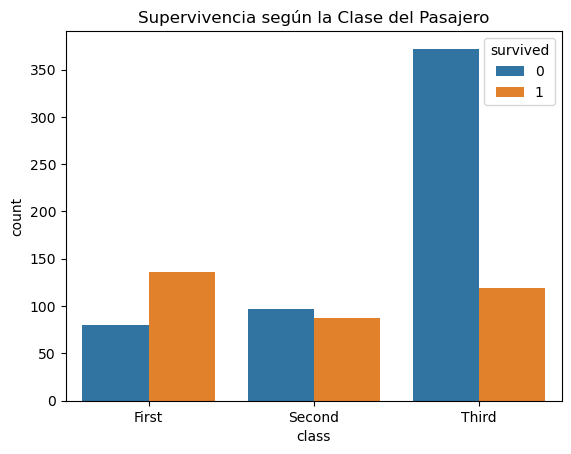

In [ ]:
# Relación entre la supervivencia y la clase del pasajero
sns.countplot(data=titanic, x='class', hue='survived')
plt.title('Supervivencia según la Clase del Pasajero')
plt.show()

El gráfico muestra que los pasajeros de primera clase tenían una tasa de supervivencia mucho más alta que los de segunda y tercera clase. Esto podría ser debido a que los pasajeros de primera clase tenían un acceso más fácil a los botes salvavidas.

Finalmente, vamos a explorar la relación entre la supervivencia y el puerto de embarque.

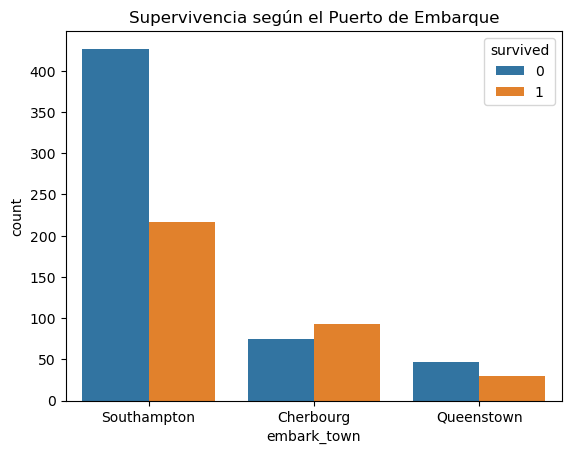

In [ ]:
# Relación entre la supervivencia y el puerto de embarque
sns.countplot(data=titanic, x='embark_town', hue='survived')
plt.title('Supervivencia según el Puerto de Embarque')
plt.show()

El gráfico muestra que los pasajeros que embarcaron en Cherbourg tenían una tasa de supervivencia más alta en comparación con los que embarcaron en Southampton y Queenstown. Esto podría ser debido a varios factores, como la clase del pasajero o el sexo, que también están correlacionados con la supervivencia.

Este análisis exploratorio nos ha permitido entender mejor los datos y las relaciones entre las diferentes variables. Sin embargo, hay mucho más que se podría hacer, como realizar un análisis más detallado de las variables, tratar los valores perdidos y crear modelos de predicción.

## Estadística Descriptiva

Vamos a calcular algunas estadísticas descriptivas para las variables numéricas en nuestro conjunto de datos.

In [ ]:
# Estadísticas descriptivas
titanic.describe(include='all')

Las estadísticas descriptivas nos proporcionan una visión general de las variables en nuestro conjunto de datos. Por ejemplo, podemos ver que la edad media de los pasajeros era de alrededor de 30 años, y que la tarifa media era de alrededor de 32. También podemos ver que había más hombres que mujeres a bordo, y que la mayoría de los pasajeros embarcaron en Southampton.

## Estadística Inferencial

Vamos a realizar algunas pruebas estadísticas para inferir las relaciones entre las variables. En particular, vamos a realizar una prueba Chi-cuadrado para examinar la relación entre la supervivencia y otras variables categóricas.

In [ ]:
from scipy.stats import chi2_contingency

# Prueba Chi-cuadrado para la supervivencia y el sexo
contingency_table = pd.crosstab(titanic['survived'], titanic['sex'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
p

1.1973570627755645e-58

El valor p es extremadamente pequeño, lo que indica que hay una fuerte relación entre el sexo del pasajero y la supervivencia. Esto confirma lo que vimos en nuestro análisis exploratorio de los datos.

Vamos a realizar la misma prueba para la clase del pasajero.

In [ ]:
# Prueba Chi-cuadrado para la supervivencia y la clase del pasajero
contingency_table = pd.crosstab(titanic['survived'], titanic['class'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
p

4.549251711298793e-23

El valor p es también extremadamente pequeño, lo que indica que hay una fuerte relación entre la clase del pasajero y la supervivencia. Esto también confirma lo que vimos en nuestro análisis exploratorio de los datos.

Estas pruebas estadísticas nos permiten inferir relaciones entre las variables y proporcionan una base sólida para cualquier análisis o modelado adicional que podamos querer hacer.